In [1]:
import numpy as np

f = "/home/george-vengrovski/Documents/projects/tweety_bert_paper/files/umap_dict_file.npz"

f = np.load(f, allow_pickle=True)

spec = f["behavioralArr"]
labels = f["colors_per_timepoint"]




(500000, 2)
(513, 2000)
(2000,)


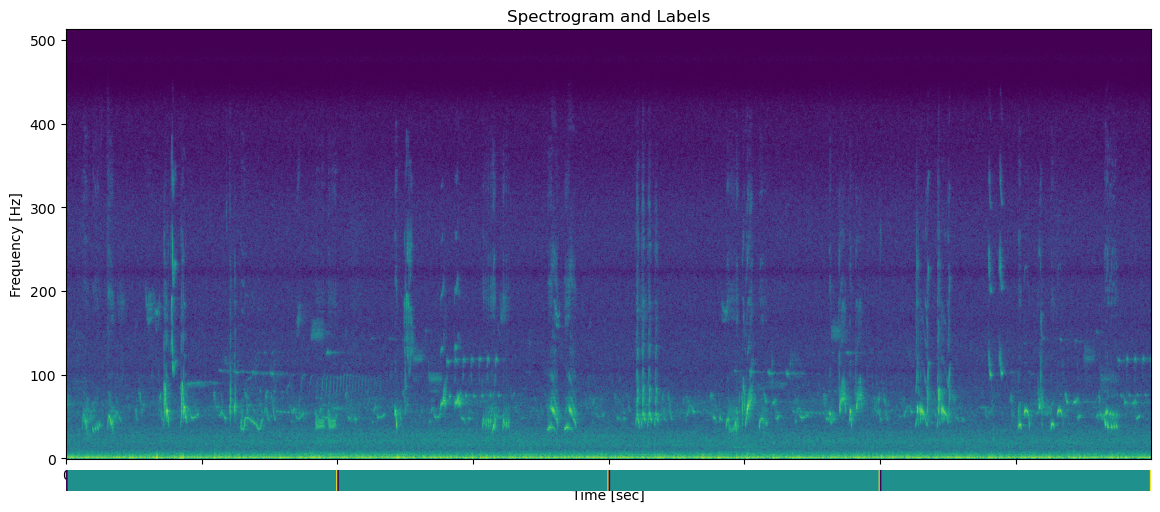

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_spectrogram_with_labels(file_path):
    # Load data from the .npz file
    data = np.load(file_path, allow_pickle=True)
    spec = data["s"]  # Spectrogram data
    labels = data["hdbscan_labels"]  # Integer labels per timepoint
    embedding = data["embedding_outputs"]

    print(embedding.shape)

    # Only consider the first 1000 timepoints for plotting
    spec_slice = spec[18000:20000, :]  # Take all frequency bins, but only the first 1000 timepoints
    labels_slice = labels[18000:20000]  # Take the first 1000 labels
    spec_slice = spec_slice.T

    print(spec_slice.shape)
    print(labels_slice.shape)

    # Create a colormap for the labels
    unique_labels = np.unique(labels_slice)
    num_labels = len(unique_labels)
    cmap = plt.get_cmap('viridis', num_labels)
    colors = cmap(np.linspace(0, 1, num_labels))

    # Set up the figure and gridspec
    fig = plt.figure(figsize=(14, 6))
    gs = fig.add_gridspec(2, 1, height_ratios=[20, 1], hspace=0.05)

    # Create a spectrogram axis
    ax0 = fig.add_subplot(gs[0])
    im = ax0.imshow(spec_slice, aspect='auto', origin='lower')
    ax0.set_xlabel('Time [sec]')
    ax0.set_ylabel('Frequency [Hz]')
    ax0.set_title('Spectrogram and Labels')

    # Create an axis for the labels color bar
    ax1 = fig.add_subplot(gs[1])
    label_colors = [colors[np.where(unique_labels == label)[0][0]] for label in labels_slice]
    label_colors = np.array(label_colors).reshape(1, -1, 4)
    ax1.imshow(label_colors, aspect='auto', origin='lower')

    # Remove y-ticks, y-label and x-ticks from the labels color bar
    ax1.axis('off')

    plt.show()

# Load the NPZ file and call the function to plot
file_path = "/home/george-vengrovski/Documents/projects/tweety_bert_paper/files/labels_noise_aug_cvm-attn-1-brownthrasher.npz"
plot_spectrogram_with_labels(file_path)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_spectrogram_with_embedding(file_path):
    # Load data from the .npz file
    data = np.load(file_path, allow_pickle=True)
    spec = data["s"]  # Spectrogram data
    labels = data["hdbscan_labels"]  # Integer labels per timepoint
    embedding = data["embedding_outputs"]
    print(embedding.shape)

    # Only consider a specific slice for plotting
    spec_slice = spec[5000:7000, :].T  # Transpose to make frequency the first dimension
    embedding_slice = embedding[5000:7000, :]  # Take the corresponding embedding coordinates
    print(spec_slice.shape)
    print(embedding_slice.shape)

    # Normalize the spectrogram values to the range [0, 1]
    spec_slice_normalized = (spec_slice - np.min(spec_slice)) / (np.max(spec_slice) - np.min(spec_slice))

    # Normalize the embedding dimensions between 0 and 1
    embedding_slice_normalized = (embedding_slice - embedding_slice.min(axis=0)) / (embedding_slice.max(axis=0) - embedding_slice.min(axis=0))

    # Set up the figure and gridspec
    fig, axs = plt.subplots(2, 1, figsize=(14, 6), gridspec_kw={'height_ratios': [20, 1], 'hspace': 0.05})

    # Plot the spectrogram
    im = axs[0].imshow(spec_slice_normalized, aspect='auto', origin='lower', cmap='inferno', extent=[0, spec_slice_normalized.shape[1], 0, spec_slice_normalized.shape[0]])
    axs[0].set_xlabel('Time [sec]')
    axs[0].set_ylabel('Frequency [Hz]')
    axs[0].set_title('Spectrogram and Embedding')

    # Plot the embedding gradient colorbar as a mix of two colors across one dimension
    embedding_gradient = np.mean(embedding_slice_normalized, axis=1)
    embedding_gradient = np.tile(embedding_gradient, (2, 1))  # Duplicate to match the height of the colorbar
    axs[1].imshow(embedding_gradient, aspect='auto', origin='lower', extent=[0, spec_slice_normalized.shape[1], 0, 1])
    axs[1].set_yticks([])
    axs[1].set_xlabel('Embedding Dimension')

    plt.show()

# Load the NPZ file and call the function to plot
file_path = "/home/george-vengrovski/Documents/projects/tweety_bert_paper/files/labels_noise_aug_cvm-attn-1-brownthrasher.npz"
plot_spectrogram_with_embedding(file_path)


FileNotFoundError: [Errno 2] No such file or directory: '/home/george-vengrovski/Documents/projects/tweety_bert_paper/files/labels_noise_aug_cvm-attn-1-brownthrasher.npz'

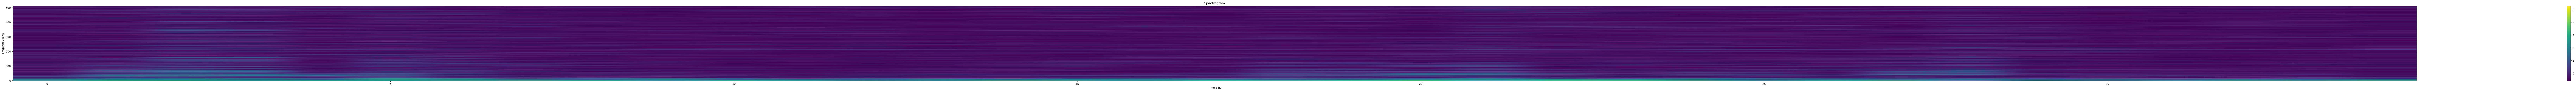

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Path to the .npz file
file_path = "/media/george-vengrovski/disk2/budgie/pair_spec/pair1_warble_00006_20231104111925_0_part2.npz"

# Load the .npz file
data = np.load(file_path, allow_pickle=True)

# Plot the spectrogram
plt.figure(figsize=(200, 5))  # Set the figure size (width, height) in inches
plt.imshow(data['s'], aspect='auto', origin='lower')
plt.colorbar()  # Add a colorbar to indicate the scale
plt.xlabel('Time Bins')  # Label for the x-axis
plt.ylabel('Frequency Bins')  # Label for the y-axis
plt.title('Spectrogram')  # Title of the plot
plt.show()
